In [1]:
import cv2
import numpy as np
import dlib
# import face_recognition
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
lip_cascade = cv2.CascadeClassifier('haarcascade_smile.xml') 

In [2]:
def getFace(img):
    faces = detector(img)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(img, face)
    pts = []
    for n in range(0, 16):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(26, 21, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(21, 16, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))

    x = landmarks.part(0).x
    y = landmarks.part(0).y
    pts.append((x, y))

    pts = np.array(pts)

    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    cropped = img[y:y+h, x:x+w].copy()
#     pts = pts - pts.min(axis=0)

#     mask = np.zeros(croped.shape[:2], np.uint8)
#     cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
#     dst = cv2.bitwise_and(croped, croped, mask=mask)

#     ## (4) add the white background
#     bg = np.ones_like(croped, np.uint8)*255
#     cv2.bitwise_not(bg,bg, mask=mask)
#     dst2 = bg+ dst

    return cropped

In [3]:
def getLips(img):
    faces = detector(img)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(img, face)
    pts = []
    for n in range(48, 60):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    
    x = landmarks.part(48).x
    y = landmarks.part(48).y
    pts.append((x, y))

    pts = np.array(pts)

    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    cropped = img[y:y+h, x:x+w].copy()
    
#     pts = pts - pts.min(axis=0)

#     mask = np.zeros(croped.shape[:2], np.uint8)
#     cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
#     dst = cv2.bitwise_and(croped, croped, mask=mask)

#     ## (4) add the white background
#     bg = np.ones_like(croped, np.uint8)*255
#     cv2.bitwise_not(bg,bg, mask=mask)
#     dst2 = bg+ dst
    return cropped

In [4]:
def preprocess(img):
    average_intensity = np.average(img)
    if average_intensity < 80:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=1.5, beta=5)
    elif average_intensity < 60:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=2.5, beta=5)
    elif average_intensity < 40:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=3.5, beta=5)
    elif average_intensity < 30:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=4.5, beta=5)
    else:
        preprocessed_img = img
    return preprocessed_img

In [5]:
def lableToName(label: str):
    if label==0:
        return 'joy'
    elif label==1:
        return 'neutral'
    elif label==2:
        return 'surprise'

In [9]:
temp = face_img

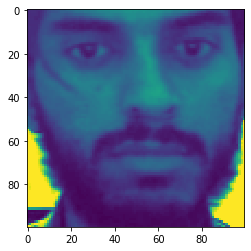

In [55]:
plt.imshow(temp)

In [6]:
model = tf.keras.models.load_model('saveModel/cnn_full_face_end2end.h5') 

In [9]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (1, 50)
fontScale              = 1
fontColor              = (10,10,10)
lineType               = 2

In [8]:
img.shape

NameError: name 'img' is not defined

In [11]:
# mobile_link = "http://192.168.43.241:4747/video"
video_capture = cv2.VideoCapture(1) 

while True:
    #read 
    ret, img = video_capture.read()
    img_c = img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    # partial error handling
    try:
        face_img = getFace(img)
        face_img = cv2.resize(face_img, (100, 100))
    except UnboundLocalError as ex:
#         cv2.imshow('face', face_img)
        cv2.putText(img_c, 'face not detected', bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
        cv2.imshow('camera feed', img_c)
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
        continue        

    # preprocessing
    face_img = preprocess(face_img)
        
    # model inference
    img_array = image.img_to_array(face_img)
    img_batch = np.expand_dims(img_array, axis=0) 
    emo = np.argmax(model.predict(img_batch))
    
    emotion = lableToName(emo)
    print(emotion)

    # diplay image
    cv2.putText(img_c, emotion, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    cv2.imshow('camera feed', img_c)
    cv2.resize(face_img, (400, 400))    
    face_img = cv2.imshow('face', face_img) 
    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

video_capture.release()
cv2.destroyAllWindows()


neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
joy
joy
neutral
neutral
joy
joy
joy
joy
joy
joy
joy
neutral
joy
joy
joy
joy
neutral
joy
joy
joy
joy
neutral
joy
joy
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
joy
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
joy
surprise
neutral
neutral
neutral
joy
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
joy
joy
joy
joy

In [19]:
import cv2
import numpy as np
import dlib
# import face_recognition
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image


def getFace(img):
    faces = detector(img)
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(img, face)
    pts = []
    for n in range(0, 16):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(26, 21, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))
    for n in range(21, 16, -1):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pts.append((x, y))

    x = landmarks.part(0).x
    y = landmarks.part(0).y
    pts.append((x, y))

    pts = np.array(pts)

    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    cropped = img[y:y+h, x:x+w].copy()
    return cropped
    
    
def preprocess(img):
    average_intensity = np.average(img)
    if average_intensity < 80:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=1.5, beta=5)
    elif average_intensity < 60:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=2.5, beta=5)
    elif average_intensity < 40:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=3.5, beta=5)
    elif average_intensity < 30:
        preprocessed_img = cv2.convertScaleAbs(img, alpha=4.5, beta=5)
    else:
        preprocessed_img = img
    return preprocessed_img

def lableToName(label: str):
    if label==0:
        return 'joy'
    elif label==1:
        return 'neutral'
    elif label==2:
        return 'surprise'
    
    
    
    
def predictFacialExpression(img):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    model = tf.keras.models.load_model('saveModel/cnn_full_face_end2end.h5') 

    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (1, 50)
    fontScale              = 1
    fontColor              = (10,10,10)
    lineType               = 2

    #mobile_link = "http://192.168.43.241:4747/video"
#     video_capture = cv2.VideoCapture(1) 

    while True:
        #read 
#         ret, img = video_capture.read()
        img_c = img
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        # partial error handling
        try:
            face_img = getFace(img)
            face_img = cv2.resize(face_img, (100, 100))
        except UnboundLocalError as ex:
    #         cv2.imshow('face', face_img)
            cv2.putText(img_c, 'face not detected', bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
            cv2.imshow('camera feed', img_c)
            if cv2.waitKey(1) & 0xFF == ord('q'): 
                break
            continue        

        # preprocessing
        face_img = preprocess(face_img)

        # model inference
        img_array = image.img_to_array(face_img)
        img_batch = np.expand_dims(img_array, axis=0) 
        emo = np.argmax(model.predict(img_batch))

        emotion = lableToName(emo)
        print(emotion)

        # diplay image
        cv2.putText(img_c, emotion, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
        cv2.imshow('camera feed', img_c)
        cv2.resize(face_img, (400, 400))    
        face_img = cv2.imshow('face', face_img) 

        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break

    video_capture.release()
    cv2.destroyAllWindows()

In [20]:
from NeuralNetworkInference import predictFacialExpression

In [21]:
predictFacialExpression

<function NeuralNetworkInference.predictFacialExpression(img)>